In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from scipy import stats
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.utils.testing import ignore_warnings
#from skew_autotransform import skew_autotransform

In [2]:
pwd

'C:\\Users\\paavai\\Desktop\\forest'

In [3]:
train=pd.read_csv('C:/Users/paavai/Desktop/forest/train.csv')
test=pd.read_csv('C:/Users/paavai/Desktop/forest/test.csv')

In [ ]:
train.shape

In [ ]:
test.shape

In [ ]:
train.columns

In [ ]:
# getting the columns of train set:
#Elevation = train["Elevation"]
##Slope = train["Slope"]
#Horizontal_Distance_To_Hydrology = train["Horizontal_Distance_To_Hydrology"]
#Vertical_Distance_To_Hydrology = train["Vertical_Distance_To_Hydrology"]
#Horizontal_Distance_To_Roadways = train["Horizontal_Distance_To_Roadways"]
#Hillshade_9am = train["Hillshade_9am"]
#Hillshade_Noon = train["Hillshade_Noon"]
#Hillshade_3pm = train["Hillshade_3pm"]
#Horizontal_Distance_To_Fire_Points = train["Horizontal_Distance_To_Fire_Points"]
Wilderness_Area = train[["Wilderness_Area1","Wilderness_Area2","Wilderness_Area3","Wilderness_Area4"]]
Soil_Type = train[['Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']]
#Cover_Type = train["Cover_Type"]

In [4]:
trainset= train.drop('Id',axis = 1)
testset= test.drop('Id',axis = 1)

In [5]:
pd.set_option('display.max_columns', 60)
print("Trainset details:")
display(trainset.describe())
print("Testset details:")
display(testset.describe())

Trainset details:


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0.0,0.000066,0.000661,0.141667,0.026852,0.015013,0.031481,0.011177,0.0,0.007540,0.040476,0.003968,0.003042,0.009193,0.001058,0.022817,0.050066,0.016997,0.000066,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0.0,0.008133,0.025710,0.348719,0.161656,0.121609,0.174621,0.105133,0.0,0.086506,0.197080,0.062871,0.055075,0.095442,0.032514,0.149326,0.218089,0.129265,0.008133,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,3104.00000

Testset details:


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.00000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000,565892.000000
mean,2964.977407,155.629558,14.039635,270.556622,46.294408,2367.143116,212.131133,223.435026,142.726951,1992.826227,0.454502,0.051927,0.436506,0.057066,0.004729,0.012197,0.006823,0.020416,0.002531,0.010470,0.000186,0.000315,0.002009,0.053883,0.021213,0.052561,0.029962,0.000760,0.000005,0.004826,0.004966,0.003250,0.007024,0.016116,0.001453,0.058364,0.100717,0.037147,0.000836,0.00448,0.001893,0.001656,0.201374,0.052033,0.044768,0.091588,0.078704,0.002808,0.003161,0.000193,0.000467,0.026233,0.023236,0.014651
std,273.157030,111.962120,7.450155,212.500153,58.209469,1561.482002,26.661063,19.668053,38.030094,1327.396895,0.497926,0.221880,0.495953,0.231968,0.068604,0.109763,0.082318,0.141417,0.050241,0.101787,0.013620,0.017733,0.044779,0.225787,0.144092,0.223156,0.170481,0.027555,0.002302,0.069302,0.070292,0.056914,0.083516,0.125922,0.038085,0.234432,0.300954,0.189121,0.028899,0.06678,0.043463,0.040658,0.401027,0.222094,0.206795,0.288444,0.269277,0.052916,0.056137,0.013877,0.021594,0.159827,0.150652,0.120152
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2818.000000,58.000000,9.000000,108.000000,7.000000,1116.000000,198.000000,213.000000,119.000000,1034.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2999.000000,127.000000,13.000000,228.000000,29.000000,2018.000000,218.000000,226.000000,143.000000,1723.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

# Detecting and Removing outliers

In [ ]:
# To detect outliers:
sns.boxplot(data=trainset["Elevation"])

q1 = pd.DataFrame(trainset["Elevation"]).quantile(0.25)[0]
q3 = pd.DataFrame(trainset["Elevation"]).quantile(0.75)[0]
iqr = q3 - q1 #Interquartile range

fence_low = q1 - (1.5*iqr)
fence_high = q3 + (1.5*iqr)

print("iqr:" ,iqr)
print("fence_low:" ,fence_low)
print("fence_high" ,fence_high)

In [ ]:
sns.boxplot(data=trainset["Aspect"])

q1 = pd.DataFrame(trainset["Aspect"]).quantile(0.25)[0]
q3 = pd.DataFrame(trainset["Aspect"]).quantile(0.75)[0]
iqr = q3 - q1 #Interquartile range

fence_low = q1 - (1.5*iqr)
fence_high = q3 + (1.5*iqr)

print("iqr:" ,iqr)
print("fence_low:" ,fence_low)
print("fence_high" ,fence_high)

In [ ]:
sns.boxplot(data=trainset["Slope"])

q1 = pd.DataFrame(trainset["Slope"]).quantile(0.25)[0]
q3 = pd.DataFrame(trainset["Slope"]).quantile(0.75)[0]
iqr = q3 - q1 #Interquartile range

fence_low = q1 - (1.5*iqr)
fence_high = q3 + (1.5*iqr)

print("iqr:" ,iqr)
print("fence_low:" ,fence_low)
print("fence_high" ,fence_high)

In [ ]:
sns.boxplot(data=trainset["Horizontal_Distance_To_Hydrology"])

q1 = pd.DataFrame(trainset["Horizontal_Distance_To_Hydrology"]).quantile(0.25)[0]
q3 = pd.DataFrame(trainset["Horizontal_Distance_To_Hydrology"]).quantile(0.75)[0]
iqr = q3 - q1 #Interquartile range

fence_low = q1 - (1.5*iqr)
fence_high = q3 + (1.5*iqr)

print("iqr:" ,iqr)
print("fence_low:" ,fence_low)
print("fence_high" ,fence_high)

In [ ]:
sns.boxplot(data=trainset["Vertical_Distance_To_Hydrology"])

q1 = pd.DataFrame(trainset["Vertical_Distance_To_Hydrology"]).quantile(0.25)[0]
q3 = pd.DataFrame(trainset["Vertical_Distance_To_Hydrology"]).quantile(0.75)[0]
iqr = q3 - q1 #Interquartile range

fence_low = q1 - (1.5*iqr)
fence_high = q3 + (1.5*iqr)

print("iqr:" ,iqr)
print("fence_low:" ,fence_low)
print("fence_high" ,fence_high)

In [ ]:
sns.boxplot(data=trainset["Horizontal_Distance_To_Roadways"])

q1 = pd.DataFrame(trainset["Horizontal_Distance_To_Roadways"]).quantile(0.25)[0]
q3 = pd.DataFrame(trainset["Horizontal_Distance_To_Roadways"]).quantile(0.75)[0]
iqr = q3 - q1 #Interquartile range

fence_low = q1 - (1.5*iqr)
fence_high = q3 + (1.5*iqr)

print("iqr:" ,iqr)
print("fence_low:" ,fence_low)
print("fence_high" ,fence_high)

In [ ]:
sns.boxplot(data=trainset["Hillshade_9am"])

q1 = pd.DataFrame(trainset["Hillshade_9am"]).quantile(0.25)[0]
q3 = pd.DataFrame(trainset["Hillshade_9am"]).quantile(0.75)[0]
iqr = q3 - q1 #Interquartile range

fence_low = q1 - (1.5*iqr)
fence_high = q3 + (1.5*iqr)

print("iqr:" ,iqr)
print("fence_low:" ,fence_low)
print("fence_high" ,fence_high)

In [ ]:
sns.boxplot(data=trainset["Hillshade_Noon"])

q1 = pd.DataFrame(trainset["Hillshade_Noon"]).quantile(0.25)[0]
q3 = pd.DataFrame(trainset["Hillshade_Noon"]).quantile(0.75)[0]
iqr = q3 - q1 #Interquartile range

fence_low = q1 - (1.5*iqr)
fence_high = q3 + (1.5*iqr)

print("iqr:" ,iqr)
print("fence_low:" ,fence_low)
print("fence_high" ,fence_high)

In [ ]:
sns.boxplot(data=trainset["Hillshade_3pm"])

q1 = pd.DataFrame(trainset["Hillshade_3pm"]).quantile(0.25)[0]
q3 = pd.DataFrame(trainset["Hillshade_3pm"]).quantile(0.75)[0]
iqr = q3 - q1 #Interquartile range

fence_low = q1 - (1.5*iqr)
fence_high = q3 + (1.5*iqr)

print("iqr:" ,iqr)
print("fence_low:" ,fence_low)
print("fence_high" ,fence_high)

In [ ]:
sns.boxplot(data=trainset["Horizontal_Distance_To_Fire_Points"])

q1 = pd.DataFrame(trainset["Horizontal_Distance_To_Fire_Points"]).quantile(0.25)[0]
q3 = pd.DataFrame(trainset["Horizontal_Distance_To_Fire_Points"]).quantile(0.75)[0]
iqr = q3 - q1 #Interquartile range

fence_low = q1 - (1.5*iqr)
fence_high = q3 + (1.5*iqr)

print("iqr:" ,iqr)
print("fence_low:" ,fence_low)
print("fence_high" ,fence_high)

In [ ]:
sns.boxplot(data=Wilderness_Area)

q1 = pd.DataFrame(Wilderness_Area).quantile(0.25)[0]
q3 = pd.DataFrame(Wilderness_Area).quantile(0.75)[0]
iqr = q3 - q1 #Interquartile range

fence_low = q1 - (1.5*iqr)
fence_high = q3 + (1.5*iqr)

print("iqr:" ,iqr)
print("fence_low:" ,fence_low)
print("fence_high" ,fence_high)

In [ ]:
sns.boxplot(data=Soil_Type)

q1 = pd.DataFrame(Soil_Type).quantile(0.25)[0]
q3 = pd.DataFrame(Soil_Type).quantile(0.75)[0]
iqr = q3 - q1 #Interquartile range

fence_low = q1 - (1.5*iqr)
fence_high = q3 + (1.5*iqr)

print("iqr:" ,iqr)
print("fence_low:" ,fence_low)
print("fence_high" ,fence_high)

Features with more outliers: Horizontal_Distance_To_Roadways has outlier of 1506 and Horizontal_Distance_To_Fire_Points has outlier range of 1258.25
Here we are removing outliers only from these two columns.

In [6]:
# Removing outlier only from Horizontal_Distance_To_Roadways:

Q1 = trainset['Horizontal_Distance_To_Roadways'].quantile(0.25)
Q3 = trainset['Horizontal_Distance_To_Roadways'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (trainset['Horizontal_Distance_To_Roadways'] >= Q1 - 1.5 * IQR) & (trainset['Horizontal_Distance_To_Roadways'] <= Q3 + 1.5 *IQR)
outlier_1 = trainset.loc[filter]  

In [7]:
# Removing outlier only from Horizontal_Distance_To_Fire_Points:

Q1 = trainset['Horizontal_Distance_To_Fire_Points'].quantile(0.25)
Q3 = trainset['Horizontal_Distance_To_Fire_Points'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter_2 = (outlier_1['Horizontal_Distance_To_Fire_Points'] >= Q1 - 1.5 * IQR) & (outlier_1['Horizontal_Distance_To_Fire_Points'] <= Q3 + 1.5 *IQR)
train_df = outlier_1.loc[filter_2]  

In [8]:
# Final dataset after removing huge outliers:
Q1 = train_df.quantile(0.25)
Q3 = train_df.quantile(0.75)
IQR = Q3 - Q1


In [ ]:
train_df.shape

In [ ]:
train_df.describe()

 we can see that soiltype 7, 8 and 15 are filled with 0 values completely. Hence dropping them would lead us better prediction
    

In [9]:
new_train = train_df.drop(['Soil_Type7','Soil_Type8','Soil_Type15'], axis =1 )

In [10]:
# Target variable analysis:
new_train['Cover_Type'].describe()

count    13827.000000
mean         4.098214
std          1.944861
min          1.000000
25%          3.000000
50%          4.000000
75%          6.000000
max          7.000000
Name: Cover_Type, dtype: float64

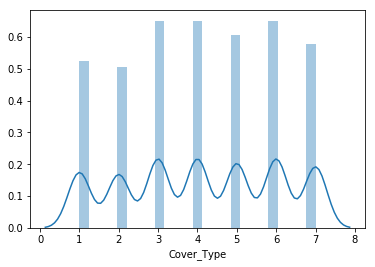

In [11]:
sns.distplot(new_train['Cover_Type'])

In [13]:
# Correlation test 
corr_val = new_train.corr()
corr_val.sort_values(["Cover_Type"])
corr_val.Cover_Type.sort_values(ascending=False)
#cormatrix.sort_values(by='Correlation', ascending=True'

Cover_Type                            1.000000
Soil_Type38                           0.256618
Soil_Type39                           0.245452
Soil_Type40                           0.181216
Soil_Type10                           0.118157
Soil_Type35                           0.115048
Soil_Type37                           0.074080
Slope                                 0.055935
Wilderness_Area3                      0.054120
Wilderness_Area4                      0.047154
Vertical_Distance_To_Hydrology        0.043102
Soil_Type17                           0.034877
Soil_Type13                           0.034114
Elevation                             0.033288
Wilderness_Area2                      0.026491
Soil_Type36                           0.026308
Soil_Type16                           0.024963
Soil_Type5                            0.024245
Soil_Type30                           0.022101
Soil_Type14                           0.018074
Soil_Type2                            0.013412
Soil_Type1   

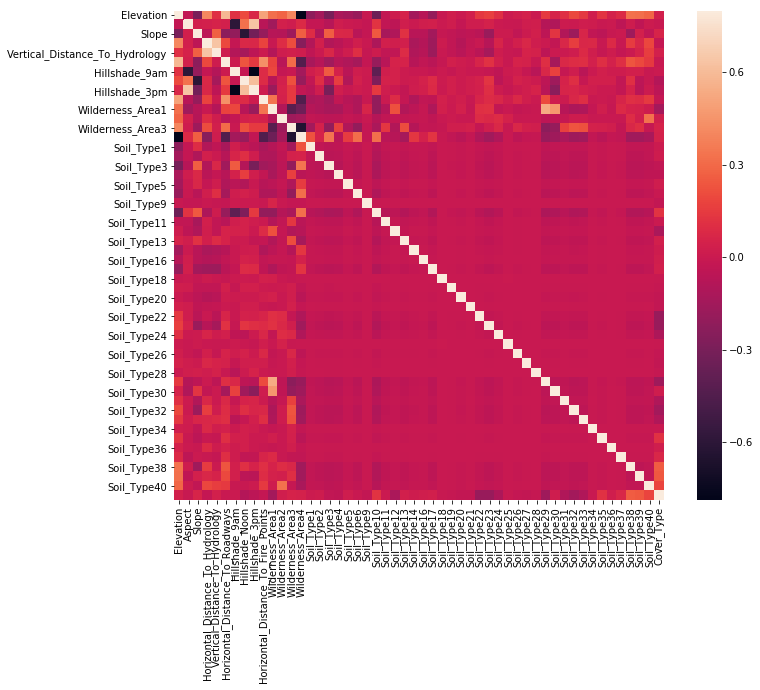

In [14]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_val, vmax=.8, square=True);

In [15]:
#Finding the skewness and kurtosis of data:
skewness = skew(new_train["Cover_Type"])
kurtosis = kurtosis(new_train["Cover_Type"])

In [16]:
print("Skewness of the train data:" , skewness)
print("Kurtosis of the train data:", kurtosis)

Skewness of the train data: -0.0680178744053693
Kurtosis of the train data: -1.1724091454682173


In [17]:
# Finding mean and standard deviation:
mean = new_train["Cover_Type"].describe()['mean']
SD = new_train["Cover_Type"].describe()['std'] # deviation of data from mean
print("mean:", mean)
print("Standard deviation:" , SD)

mean: 4.0982136399797495
Standard deviation: 1.9448609593937478


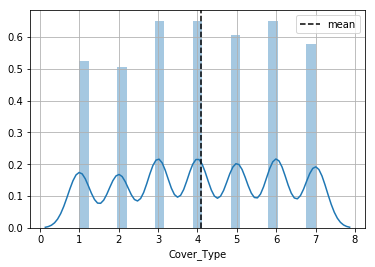

In [18]:
#plotting skewness 
sns.distplot(new_train["Cover_Type"], norm_hist = True)
plt.axvline(x = mean, color = "black", linestyle = "--", label = "mean")
plt.legend()
plt.grid()
plt.show()

In [19]:
new_train.isnull().values.any()

False

In [20]:
target_variable = new_train.pop('Cover_Type')

In [24]:
target_variable.shape

(13827,)